# Polynomial regression
In this project we will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular we will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data


In [1]:
import turicreate as tc

Next we're going to write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the poours up to the maximal degree.

The easiest way to apply a poour to an SArray is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third poour we can do as follows: (note running this cell the first time may take longer than expected since it loads Turi Create)

# Polynomial_sframe function

In [2]:
def polynomial_sframe(feature, degree):
    poly_sframe = tc.SFrame()
    poly_sframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1): 
            name = 'power_' + str(power)
            poly_sframe[name] = feature.apply(lambda x:x**power)

    return poly_sframe

In [3]:
sales = tc.SFrame('home_data.sframe')
sales = sales.sort(['sqft_living', 'price'])

In [4]:
set1,set3 = sales.random_split(0.5,seed=0)
set1,set2 = set1.random_split(0.5,seed=0)
set3,set4 = set3.random_split(0.5,seed=0)

# Getting polynomial data from the given sframe and different degrees

Also fitting models on these datasets

In [5]:
poly1 = polynomial_sframe(set1['sqft_living'], 15)
poly1_features = poly1.column_names()
poly1['price'] = set1['price']

model1 = tc.linear_regression.create(poly1, target = 'price', features = poly1_features, validation_set = None)

poly2 = polynomial_sframe(set2['sqft_living'], 15)
poly2_features = poly2.column_names()
poly2['price'] = set2['price']

model2 = tc.linear_regression.create(poly2, target = 'price', features = poly2_features, validation_set = None)

poly3 = polynomial_sframe(set3['sqft_living'], 15)
poly3_features = poly3.column_names()
poly3['price'] = set3['price']

model3 = tc.linear_regression.create(poly3, target = 'price', features = poly3_features, validation_set = None)

poly4 = polynomial_sframe(set4['sqft_living'], 15)
poly4_features = poly4.column_names()
poly4['price'] = set4['price']

model4 = tc.linear_regression.create(poly4, target = 'price', features = poly4_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.029091     | 2195218.932304     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024994     | 2069212.978546     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.025445     | 2269769.506523     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.026401     | 2314893.173833     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [6]:
model1.coefficients.print_rows(num_rows = 16)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    223312.75025160407   |   1059478.8396664988   |
|   power_1   |  None |    118.08612758167172   |   4926.728597959662    |
|   power_2   |  None |   -0.04734820113038682  |   9.618876220757953    |
|   power_3   |  None |   3.25310342456275e-05  |  0.010456920129684797  |
|   power_4   |  None |  -3.323721525433194e-09 | 7.077779744263804e-06  |
|   power_5   |  None |  -9.758304579190195e-14 | 3.151019591665431e-09  |
|   power_6   |  None |  1.1544030344561255e-17 | 9.450786171325705e-13  |
|   power_7   |  None |  1.0514586938499019e-21 | 1.903539881113476e-16  |
|   power_8   |  None |  3.4604961652704815e-26 | 2.460853230756945e-20  |
|   power_9   |  None | -1.0965445405521245e-30 | 1.6975015750355236e-24 |
|   power_10  |  None |  

In [7]:
model2.coefficients.print_rows(num_rows = 16)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    89836.50773692486    |   1654473.3420782913   |
|   power_1   |  None |    319.8069467535043    |    9539.56944930011    |
|   power_2   |  None |   -0.1033153970317836   |   23.25194415590825    |
|   power_3   |  None |  1.0668247602737221e-05 |  0.031721164392514545  |
|   power_4   |  None |  5.755770977961591e-09  | 2.7034261615027902e-05 |
|   power_5   |  None |  -2.546634647941747e-13 | 1.5170051380911655e-08 |
|   power_6   |  None | -1.0964134506994499e-16 | 5.726362546141834e-12  |
|   power_7   |  None |  -6.364584415175958e-21 |  1.44792080471256e-15  |
|   power_8   |  None |  5.525604166579153e-25  | 2.366069422901716e-19  |
|   power_9   |  None |  1.3508203899163813e-28 | 2.3190105202027002e-23 |
|   power_10  |  None |  

In [8]:
model3.coefficients.print_rows(num_rows = 16)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    87317.97954933258    |   785138.3566148035    |
|   power_1   |  None |    356.30491105472436   |   3246.2335338038356   |
|   power_2   |  None |   -0.1648174428129611   |   5.8156511825523864   |
|   power_3   |  None |  4.404249926901375e-05  |  0.006687927703940275  |
|   power_4   |  None |  6.482348768555015e-10  | 5.794597472103832e-06  |
|   power_5   |  None |  -6.75253226682863e-13  | 3.581069707761484e-09  |
|   power_6   |  None |  -3.368425927270484e-17 | 1.4615231573555429e-12 |
|   power_7   |  None |  3.6099970440490956e-21 | 3.6944030319066605e-16 |
|   power_8   |  None |   6.4699972563541e-25   | 4.4796031815948435e-20 |
|   power_9   |  None |  4.236393887658359e-29  |          nan           |
|   power_10  |  None | -

In [9]:
model4.coefficients.print_rows(num_rows = 16)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    259020.87944519077   |   709782.7486478057    |
|   power_1   |  None |   -31.727716184975623   |   1979.753142992482    |
|   power_2   |  None |    0.1097027695990496   |          nan           |
|   power_3   |  None |  -1.583838472693362e-05 |          nan           |
|   power_4   |  None |  -4.476606238225713e-09 |          nan           |
|   power_5   |  None |  1.1397657346242307e-12 |          nan           |
|   power_6   |  None |  1.976691205374664e-16  |          nan           |
|   power_7   |  None |  -6.157836774824351e-21 |          nan           |
|   power_8   |  None | -4.8801230411732825e-24 |          nan           |
|   power_9   |  None |  -6.621867814317721e-28 |          nan           |
|   power_10  |  None | -

In [10]:
import matplotlib.pyplot as plt

# Understanding what the models did

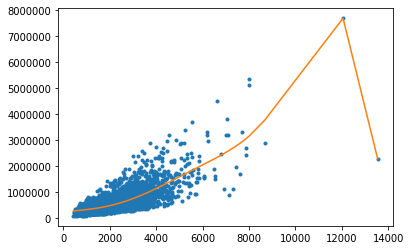

In [11]:
plt.plot(poly1['power_1'],poly1['price'],'.',
         poly1['power_1'], model1.predict(poly1),'-')

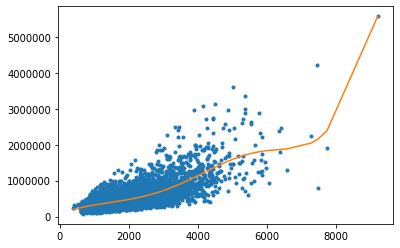

In [12]:
plt.plot(poly2['power_1'],poly2['price'],'.',
         poly2['power_1'], model2.predict(poly2),'-')

In [13]:
training_val,test = sales.random_split(0.9,seed=1)
train,val = training_val.random_split(0.5,seed=1)

In [14]:
err =[]
for i in range(1,16):
    poly = polynomial_sframe(train['sqft_living'],i)
    features_list = poly.column_names()
    poly['price'] = train['price']
    model = tc.linear_regression.create(poly, target= 'price',features = features_list, validation_set = None, verbose = False)
    poly_val = polynomial_sframe(val['sqft_living'],i)
    rss = ((val['price'] - model.predict(poly_val))**2).sum()
    err.append(rss)
p = min(err)
for i in range(15):
    if err[i] == p:
        print(i+1)

6


In [15]:
poly = polynomial_sframe(train['sqft_living'],13)
features_list = poly.column_names()
poly['price'] = train['price']
model = tc.linear_regression.create(poly, target= 'price',features = features_list, validation_set = None, verbose = False)
poly_test = polynomial_sframe(test['sqft_living'],12)
rss = ((test['price'] - model.predict(poly_test))**2).sum()
print(rss)

124585589061659.72
